# RELATÓRIO SOBRE CORONA VÍRUS NO BRASIL

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("brazil_covid19.csv")

In [19]:
df.head()

,date,hour,state,suspects,refuses,cases,deaths
0,2020-01-30,16:00,Minas Gerais,1,0,0,0
1,2020-01-30,16:00,Rio de Janeiro,1,0,0,0
2,2020-01-30,16:00,Santa Catarina,0,2,0,0
3,2020-01-30,16:00,São Paulo,3,1,0,0
4,2020-01-30,16:00,Rio Grande do Sul,2,2,0,0


In [20]:
df = df.drop('hour',axis=1)

In [21]:
df.head()

,date,state,suspects,refuses,cases,deaths
0,2020-01-30,Minas Gerais,1,0,0,0
1,2020-01-30,Rio de Janeiro,1,0,0,0
2,2020-01-30,Santa Catarina,0,2,0,0
3,2020-01-30,São Paulo,3,1,0,0
4,2020-01-30,Rio Grande do Sul,2,2,0,0


In [22]:
import collections

Altere a data aqui, quando conseguir o documento com dados de outras data. Esse filtro foi criado para evitar pegar dados com valor zero, por falta de informação

In [23]:
filter_date = df['date'] < '2020-03-19'
df = df[filter_date]
state =  df.drop('state', axis=1).groupby('date').sum()


In [24]:
state.head()

,suspects,refuses,cases,deaths
date,,,,
2020-01-30,9,6,0,0
2020-01-31,13,9,0,0
2020-02-01,16,10,0,0
2020-02-02,16,10,0,0
2020-02-03,14,13,0,0


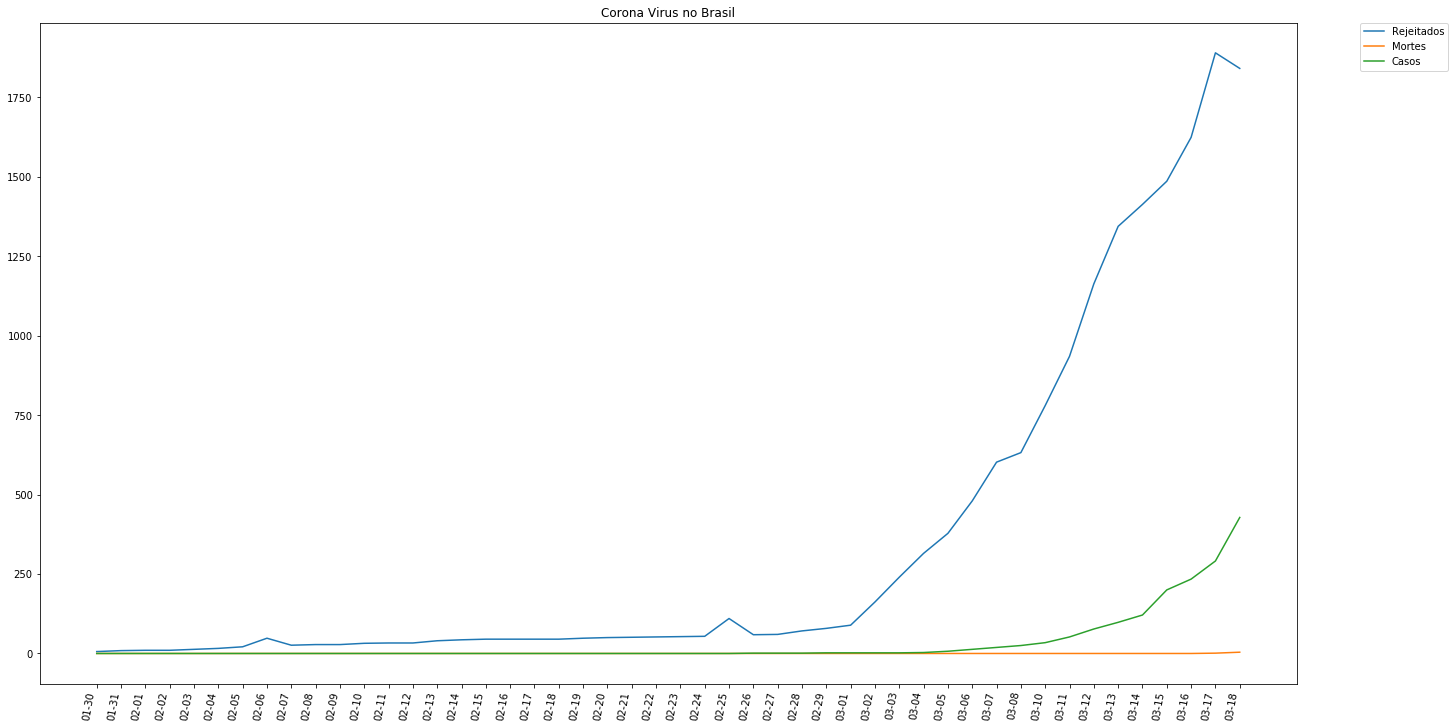

In [25]:
import operator

def namestr(**kwargs):
    for k,v in kwargs.items():
        return k 


def transformDict (state, type_graph):
    col = state[type_graph].apply(lambda _df: int(np.unique(_df))).to_dict()
    col = collections.OrderedDict(sorted(col.items()))
    return col

refuse = transformDict(state, 'refuses')
death = transformDict(state, 'deaths')
case =  transformDict(state, 'cases')
suspect = transformDict(state, 'suspects')

keys =  [str(k[5:]) for k in refuse.keys()]

fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(20, 10))
axs.plot(keys, refuse.values(), label="Rejeitados")
axs.plot(keys,death.values(), label="Mortes")
axs.plot(keys,case.values(), label="Casos")

#axs.plot(keys,suspect.values(), label="Suspeitos")
for label in axs.get_xticklabels():
    label.set_rotation(80)
    label.set_horizontalalignment('right')
axs.set_title("Corona Virus no Brasil")
axs.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


In [26]:
data = [["Brasil",suspect.popitem()[1], refuse.popitem()[1],case.popitem()[1],death.popitem()[1]]]
pd.DataFrame(data, columns=["Região","Suspeitos", "Rejeitados","Casos","Mortes"])

,Região,Suspeitos,Rejeitados,Casos,Mortes
0,Brasil,11278,1841,428,4
